In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

## How many merges?

If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? To help answer this question, think back to the video, in which Ben walked through an example of hierarchical clustering using 6 countries. How many merge operations did that example have?

Answer: 4 merges 

## Hierarchical clustering of the grain data

<p>In the video, you learned that the SciPy <code>linkage()</code> function performs hierarchical clustering on an array of samples.  Use the <code>linkage()</code> function to obtain a hierarchical clustering of the grain samples, and use <code>dendrogram()</code> to visualize the result.  A sample of the grain measurements is provided in the array <code>samples</code>, while the variety of each grain sample is given by the list <code>varieties</code>.</p>

<ul>
<li>Import:<ul>
<li><code>linkage</code> and <code>dendrogram</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li><code>matplotlib.pyplot</code> as <code>plt</code>.</li></ul></li>
<li>Perform hierarchical clustering on <code>samples</code> using the <code>linkage()</code> function with the <code>method=&apos;complete&apos;</code> keyword argument. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram using the <code>dendrogram()</code> function on <code>mergings</code>. Specify the keyword arguments <code>labels=varieties</code>, <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code>.</li>
</ul>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])


varieties= ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

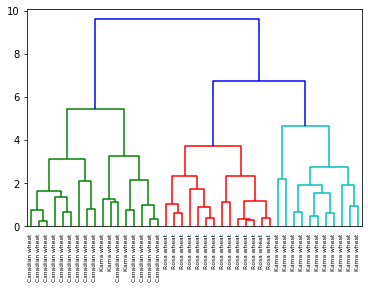

In [37]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram


# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Hierarchies of stocks

<p>In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you&apos;ll perform hierarchical clustering of the companies.  You are given a NumPy array of price movements <code>movements</code>, where the rows correspond to companies, and a list of the company names <code>companies</code>.  SciPy hierarchical clustering doesn&apos;t fit into a sklearn pipeline, so you&apos;ll need to use the <code>normalize()</code> function from <code>sklearn.preprocessing</code> instead of <code>Normalizer</code>.</p>
<p><code>linkage</code> and <code>dendrogram</code> have already been imported from <code>scipy.cluster.hierarchy</code>, and PyPlot has been imported as <code>plt</code>.</p>

<ul>
<li>Import <code>normalize</code> from <code>sklearn.preprocessing</code>.</li>
<li>Rescale the price movements for each stock by using the <code>normalize()</code> function on <code>movements</code>.</li>
<li>Apply the <code>linkage()</code> function to <code>normalized_movements</code>, using <code>&apos;complete&apos;</code> linkage, to calculate the hierarchical clustering. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram of the hierarchical clustering, using the list <code>companies</code> of company names as the <code>labels</code>. In addition, specify the <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code> keyword arguments as you did in the previous exercise.</li>
</ul>

In [46]:
movements=pd.read_csv('datasets\movements.csv')

companies=['Apple',  'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco',
 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell',
 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda',
 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin',
 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi',
 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments',
 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']



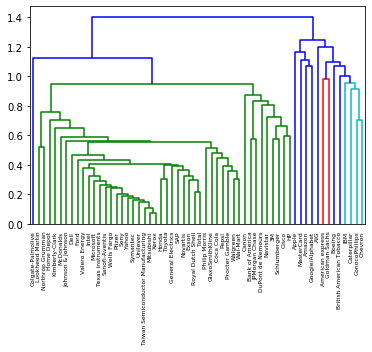

In [47]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()


## Which clusters are closest?

<p>In the video, you learned that the linkage method defines how the distance between clusters is measured.
In <em>complete</em> linkage, the distance between clusters is the distance between the <em>furthest</em> points of the clusters.
In <em>single</em> linkage, the distance between clusters is the distance between the <em>closest</em> points of the clusters.</p>
<p>Consider the three clusters in the diagram.  Which of the following statements are true?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_2997/datasets/cluster_linkage_riddle.png"></p>
<p><strong>A.</strong> In single linkage, Cluster 3 is the closest to Cluster 2.</p>
<p><strong>B.</strong> In complete linkage, Cluster 1 is the closest to Cluster 2.</p>

## Different linkage, different hierarchical clustering!

<p>In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using <code>&apos;complete&apos;</code> linkage. Now, perform a hierarchical clustering of the voting countries with <code>&apos;single&apos;</code> linkage, and compare the resulting dendrogram with the one in the video.  Different linkage, different hierarchical clustering!</p>
<p>You are given an array <code>samples</code>. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list <code>country_names</code> gives the name of each voting country. This dataset was obtained from  <a href="http://www.eurovision.tv/page/results">Eurovision</a>.</p>

<ul>
<li>Import:<ul>
<li><code>linkage</code> and <code>dendrogram</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li><code>matplotlib.pyplot</code> as <code>plt</code>.</li></ul></li>
<li>Perform hierarchical clustering on <code>samples</code> using the <code>linkage()</code> function with the <code>method=&apos;single&apos;</code> keyword argument. Assign the result to <code>mergings</code>.</li>
<li>Plot a dendrogram of the hierarchical clustering, using the list <code>country_names</code> as the <code>labels</code>. In addition, specify the <code>leaf_rotation=90</code>, and <code>leaf_font_size=6</code> keyword arguments as you have done earlier.</li>
</ul>

In [21]:
eurovision=pd.read_csv('datasets\eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [22]:
samples = np.array([[2.0,
  12.0,
  0.0,
  0.0,
  0.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  10.0,
  0.0,
  4.0,
  0.0,
  5.0,
  7.0,
  0.0,
  0.0,
  3.0,
  0.0,
  6.0,
  0.0],
 [12.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  7.0,
  8.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  1.0,
  12.0,
  0.0,
  0.0,
  2.0,
  0.0,
  10.0,
  0.0],
 [0.0,
  12.0,
  3.0,
  0.0,
  12.0,
  10.0,
  0.0,
  0.0,
  0.0,
  7.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  6.0,
  0.0,
  5.0,
  0.0,
  2.0,
  0.0,
  0.0,
  8.0,
  4.0],
 [0.0,
  3.0,
  12.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  8.0,
  4.0,
  0.0,
  7.0,
  6.0,
  10.0,
  0.0],
 [0.0,
  2.0,
  0.0,
  12.0,
  0.0,
  8.0,
  0.0,
  0.0,
  0.0,
  4.0,
  1.0,
  0.0,
  7.0,
  6.0,
  0.0,
  0.0,
  0.0,
  5.0,
  3.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0],
 [7.0,
  1.0,
  0.0,
  8.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  6.0,
  12.0,
  0.0,
  0.0,
  2.0,
  0.0,
  10.0,
  0.0],
 [7.0,
  4.0,
  3.0,
  0.0,
  12.0,
  5.0,
  0.0,
  0.0,
  0.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  6.0,
  0.0,
  0.0,
  1.0,
  10.0,
  2.0,
  0.0],
 [0.0,
  3.0,
  5.0,
  8.0,
  0.0,
  2.0,
  10.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  12.0,
  0.0,
  0.0,
  0.0,
  7.0,
  0.0],
 [8.0,
  5.0,
  4.0,
  1.0,
  0.0,
  12.0,
  0.0,
  7.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  12.0,
  0.0,
  0.0,
  3.0,
  0.0,
  10.0,
  0.0],
 [0.0,
  5.0,
  6.0,
  0.0,
  0.0,
  1.0,
  12.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  8.0,
  12.0,
  0.0,
  7.0,
  0.0,
  10.0,
  0.0],
 [8.0,
  5.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  12.0,
  0.0,
  6.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  2.0,
  10.0,
  0.0,
  0.0,
  1.0,
  0.0,
  7.0,
  0.0],
 [8.0,
  1.0,
  4.0,
  6.0,
  0.0,
  5.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.0,
  10.0,
  0.0,
  0.0,
  2.0,
  0.0,
  12.0,
  0.0],
 [0.0,
  10.0,
  1.0,
  0.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  5.0,
  4.0,
  0.0,
  0.0,
  12.0,
  7.0,
  3.0,
  0.0],
 [0.0,
  4.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.0,
  5.0,
  0.0,
  1.0,
  12.0,
  0.0,
  0.0,
  10.0,
  0.0,
  8.0,
  0.0],
 [7.0,
  3.0,
  0.0,
  0.0,
  4.0,
  10.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  2.0,
  8.0,
  12.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0],
 [0.0,
  7.0,
  6.0,
  0.0,
  0.0,
  4.0,
  0.0,
  1.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  5.0,
  8.0,
  0.0,
  0.0,
  10.0,
  0.0,
  12.0,
  0.0],
 [12.0,
  0.0,
  8.0,
  0.0,
  4.0,
  5.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.0,
  6.0,
  0.0,
  1.0,
  2.0,
  0.0,
  10.0,
  0.0],
 [12.0,
  1.0,
  0.0,
  7.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  2.0,
  0.0,
  0.0,
  6.0,
  5.0,
  0.0,
  4.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0],
 [2.0,
  5.0,
  7.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  10.0,
  12.0,
  0.0,
  0.0,
  8.0,
  3.0,
  6.0,
  0.0],
 [8.0,
  5.0,
  1.0,
  0.0,
  0.0,
  7.0,
  0.0,
  12.0,
  0.0,
  4.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0],
 [0.0,
  3.0,
  6.0,
  0.0,
  0.0,
  4.0,
  0.0,
  5.0,
  0.0,
  1.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.0,
  10.0,
  0.0,
  0.0,
  7.0,
  2.0,
  12.0,
  0.0],
 [0.0,
  8.0,
  2.0,
  1.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  0.0,
  10.0,
  7.0,
  0.0,
  0.0,
  12.0,
  6.0,
  0.0,
  0.0],
 [0.0,
  6.0,
  1.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.0,
  12.0,
  0.0,
  10.0,
  8.0,
  0.0,
  0.0,
  2.0,
  0.0,
  4.0,
  3.0],
 [6.0,
  5.0,
  3.0,
  2.0,
  1.0,
  7.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  8.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  7.0,
  0.0,
  6.0,
  0.0,
  5.0,
  3.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0,
  2.0,
  0.0,
  10.0,
  8.0,
  4.0,
  0.0,
  0.0,
  0.0,
  12.0,
  0.0],
 [0.0,
  6.0,
  4.0,
  3.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  8.0,
  0.0,
  5.0,
  12.0,
  0.0,
  0.0,
  7.0,
  0.0,
  10.0,
  0.0],
 [0.0,
  5.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  4.0,
  0.0,
  2.0,
  0.0,
  0.0,
  12.0,
  12.0,
  0.0,
  6.0,
  8.0,
  0.0,
  0.0,
  7.0,
  0.0,
  10.0,
  0.0],
 [0.0,
  12.0,
  0.0,
  6.0,
  0.0,
  8.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  5.0,
  0.0,
  7.0,
  0.0,
  0.0,
  12.0,
  0.0,
  10.0,
  0.0,
  0.0,
  0.0,
  3.0,
  4.0,
  1.0],
 [7.0,
  5.0,
  4.0,
  8.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  3.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  7.0,
  0.0,
  5.0,
  6.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  3.0,
  0.0,
  4.0,
  0.0,
  2.0,
  0.0,
  0.0,
  10.0,
  12.0,
  0.0,
  0.0,
  0.0,
  8.0,
  0.0],
 [0.0,
  8.0,
  0.0,
  0.0,
  2.0,
  5.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  12.0,
  0.0,
  10.0,
  6.0,
  0.0,
  0.0,
  7.0,
  0.0,
  4.0,
  0.0],
 [2.0,
  7.0,
  4.0,
  0.0,
  0.0,
  3.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  0.0,
  5.0,
  0.0,
  0.0,
  12.0,
  8.0,
  0.0,
  0.0,
  10.0,
  0.0,
  12.0,
  0.0],
 [12.0,
  4.0,
  8.0,
  6.0,
  0.0,
  0.0,
  0.0,
  7.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  5.0,
  12.0,
  0.0,
  0.0,
  2.0,
  0.0,
  10.0,
  0.0],
 [2.0,
  5.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  6.0,
  8.0,
  0.0,
  7.0,
  10.0,
  0.0,
  0.0,
  4.0,
  0.0,
  12.0,
  0.0],
 [2.0,
  6.0,
  0.0,
  0.0,
  5.0,
  8.0,
  4.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.0,
  12.0,
  0.0,
  1.0,
  0.0,
  7.0,
  0.0],
 [0.0,
  3.0,
  6.0,
  0.0,
  0.0,
  2.0,
  8.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  4.0,
  10.0,
  12.0,
  0.0,
  5.0,
  0.0,
  7.0,
  0.0],
 [6.0,
  4.0,
  2.0,
  0.0,
  0.0,
  12.0,
  0.0,
  0.0,
  0.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  5.0,
  8.0,
  0.0,
  12.0,
  1.0,
  0.0,
  7.0,
  0.0],
 [0.0,
  12.0,
  5.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  10.0,
  8.0,
  0.0,
  1.0,
  12.0,
  2.0,
  7.0,
  0.0],
 [0.0,
  1.0,
  10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  0.0,
  8.0,
  0.0,
  0.0,
  7.0,
  0.0,
  0.0,
  0.0,
  5.0,
  6.0,
  12.0,
  2.0,
  0.0,
  0.0,
  4.0,
  0.0],
 [8.0,
  5.0,
  6.0,
  0.0,
  12.0,
  1.0,
  0.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  3.0,
  0.0,
  0.0,
  2.0,
  12.0,
  7.0,
  0.0],
 [7.0,
  4.0,
  0.0,
  10.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.0,
  3.0,
  0.0,
  8.0,
  12.0,
  0.0,
  0.0,
  1.0,
  0.0,
  12.0,
  0.0],
 [0.0,
  6.0,
  0.0,
  0.0,
  0.0,
  8.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.0,
  12.0,
  0.0,
  10.0,
  7.0,
  0.0,
  4.0,
  1.0,
  0.0,
  5.0,
  12.0]])

country_names= ['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Norway',
 'Poland',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Ukraine',
 'United Kingdom']


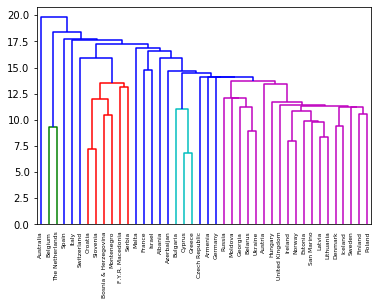

In [23]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


## Extracting the cluster labels



<p>In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the <code>fcluster()</code> function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.</p>
<p>The hierarchical clustering has already been performed and <code>mergings</code> is the result of the <code>linkage()</code> function. The list <code>varieties</code> gives the variety of each grain sample.</p>

<ul>
<li>Import:<ul>
<li><code>pandas</code> as <code>pd</code>.</li>
<li><code>fcluster</code> from <code>scipy.cluster.hierarchy</code>.</li></ul></li>
<li>Perform a flat hierarchical clustering by using the <code>fcluster()</code> function on <code>mergings</code>. Specify a maximum height of <code>6</code> and the keyword argument <code>criterion=&apos;distance&apos;</code>.</li>
<li>Create a DataFrame <code>df</code> with two columns named <code>&apos;labels&apos;</code> and <code>&apos;varieties&apos;</code>, using <code>labels</code> and <code>varieties</code>, respectively, for the column values.  This has been done for you.</li>
<li>Create a cross-tabulation <code>ct</code> between <code>df[&apos;labels&apos;]</code> and <code>df[&apos;varieties&apos;]</code> to count the number of times each grain variety coincides with each cluster label.</li>
</ul>

In [40]:
varieties=['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']


labels=np.array([3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

In [42]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


## t-SNE visualization of grain dataset


<p>In the video, you saw t-SNE applied to the iris dataset. In this exercise, you&apos;ll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array <code>samples</code> of grain samples and a list <code>variety_numbers</code> giving the variety number of each grain sample.</p>

<ul>
<li>Import <code>TSNE</code> from <code>sklearn.manifold</code>.</li>
<li>Create a TSNE instance called <code>model</code> with <code>learning_rate=200</code>.</li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>samples</code>. Assign the result to <code>tsne_features</code>.</li>
<li>Select the column <code>0</code> of <code>tsne_features</code>. Assign the result to <code>xs</code>.</li>
<li>Select the column <code>1</code> of <code>tsne_features</code>. Assign the result to <code>ys</code>.</li>
<li>Make a scatter plot of the t-SNE features <code>xs</code> and <code>ys</code>. To color the points by the grain variety, specify the additional keyword argument <code>c=variety_numbers</code>.</li>
</ul>

In [43]:
samples=np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22],
 [14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.29, 14.09, 0.905, 5.291, 3.3369999999999997, 2.699, 4.825],
 [13.84, 13.94, 0.8955, 5.324, 3.3789999999999996, 2.259, 4.805],
 [16.14, 14.99, 0.9034, 5.6579999999999995, 3.562, 1.355, 5.175],
 [14.38, 14.21, 0.8951, 5.386, 3.312, 2.4619999999999997, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0],
 [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877000000000001],
 [16.44, 15.25, 0.888, 5.8839999999999995, 3.505, 1.969, 5.5329999999999995],
 [15.26, 14.85, 0.8696, 5.7139999999999995, 3.242, 4.543, 5.314],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738],
 [13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872],
 [13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825],
 [14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781000000000001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [15.69, 14.75, 0.9058, 5.527, 3.514, 1.599, 5.046],
 [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649],
 [12.72, 13.57, 0.8686, 5.226, 3.049, 4.102, 4.914],
 [14.16, 14.4, 0.8584, 5.6579999999999995, 3.1289999999999996, 3.072, 5.176],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [15.88, 14.9, 0.8988, 5.617999999999999, 3.5069999999999997, 0.7651, 5.091],
 [12.08, 13.23, 0.8664, 5.099, 2.9360000000000004, 1.415, 4.961],
 [15.01, 14.76, 0.8657, 5.789, 3.245, 1.791, 5.001],
 [16.19, 15.16, 0.8849, 5.832999999999999, 3.4210000000000003, 0.903, 5.307],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869],
 [14.11, 14.18, 0.882, 5.541, 3.221, 2.7539999999999996, 5.038],
 [13.45, 14.02, 0.8604, 5.516, 3.065, 3.531, 5.0969999999999995],
 [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [14.09,
  14.41,
  0.8529,
  5.7170000000000005,
  3.1860000000000004,
  3.92,
  5.2989999999999995],
 [13.94, 14.17, 0.8728, 5.585, 3.15, 2.124, 5.012],
 [15.05, 14.68, 0.8779, 5.712000000000001, 3.3280000000000003, 2.129, 5.36],
 [16.12, 15.0, 0.9, 5.709, 3.485, 2.27, 5.443],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [17.08,
  15.38,
  0.9079,
  5.832000000000001,
  3.6830000000000003,
  2.9560000000000004,
  5.484],
 [14.8, 14.52, 0.8823, 5.656000000000001, 3.2880000000000003, 3.112, 5.309],
 [14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001],
 [13.54, 13.85, 0.8871, 5.348, 3.156, 2.5869999999999997, 5.178],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [13.16, 13.55, 0.9009, 5.138, 3.201, 2.461, 4.783],
 [15.5, 14.86, 0.882, 5.877000000000001, 3.3960000000000004, 4.711, 5.528],
 [15.11, 14.54, 0.8986, 5.579, 3.4619999999999997, 3.128, 5.18],
 [13.8, 14.04, 0.8794, 5.376, 3.155, 1.56, 4.961],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [14.99, 14.56, 0.8883, 5.57, 3.377, 2.958, 5.175],
 [14.79,
  14.52,
  0.8819,
  5.545,
  3.2910000000000004,
  2.7039999999999997,
  5.111000000000001],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [14.43, 14.4, 0.8751, 5.585, 3.272, 3.975, 5.144],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.49, 14.61, 0.8538, 5.715, 3.113, 4.1160000000000005, 5.396],
 [14.33, 14.28, 0.8831, 5.504, 3.199, 3.3280000000000003, 5.224],
 [14.52, 14.6, 0.8557, 5.7410000000000005, 3.113, 1.4809999999999999, 5.487],
 [15.03, 14.77, 0.8658, 5.702000000000001, 3.2119999999999997, 1.933, 5.439],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [14.92, 14.43, 0.9006, 5.3839999999999995, 3.412, 1.1420000000000001, 5.088],
 [15.38, 14.77, 0.8857, 5.662000000000001, 3.4189999999999996, 1.999, 5.222],
 [12.11, 13.47, 0.8392, 5.159, 3.032, 1.5019999999999998, 4.519],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [12.36, 13.19, 0.8923, 5.0760000000000005, 3.042, 3.22, 4.605],
 [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088],
 [12.78, 13.57, 0.8716, 5.2620000000000005, 3.0260000000000002, 1.176, 4.782],
 [12.88, 13.5, 0.8879, 5.138999999999999, 3.1189999999999998, 2.352, 4.607],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [14.01, 14.29, 0.8625, 5.609, 3.158, 2.217, 5.132000000000001],
 [14.37, 14.39, 0.8726, 5.569, 3.153, 1.464, 5.3],
 [12.73, 13.75, 0.8458, 5.412000000000001, 2.8819999999999997, 3.533, 5.067],
 [17.63, 15.98, 0.8673, 6.191, 3.5610000000000004, 4.0760000000000005, 6.06],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.26, 15.73, 0.8763, 5.978, 3.594, 4.539, 5.791],
 [19.11, 16.26, 0.9081, 6.154, 3.93, 2.9360000000000004, 6.079],
 [16.82, 15.51, 0.8786, 6.017, 3.486, 4.004, 5.841],
 [16.77, 15.62, 0.8638, 5.9270000000000005, 3.438, 4.92, 5.795],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [20.71,
  17.23,
  0.8763,
  6.579,
  3.8139999999999996,
  4.4510000000000005,
  6.4510000000000005],
 [18.94, 16.49, 0.875, 6.445, 3.639, 5.064, 6.362],
 [17.12, 15.55, 0.8892, 5.85, 3.5660000000000003, 2.858, 5.746],
 [16.53, 15.34, 0.8823, 5.875, 3.467, 5.532, 5.88],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [20.2, 16.89, 0.8894, 6.285, 3.864, 5.172999999999999, 6.187],
 [19.57, 16.74, 0.8779, 6.3839999999999995, 3.772, 1.472, 6.273],
 [19.51, 16.71, 0.878, 6.3660000000000005, 3.801, 2.9619999999999997, 6.185],
 [18.27, 16.09, 0.887, 6.172999999999999, 3.6510000000000002, 2.443, 6.197],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.98,
  16.66,
  0.8590000000000001,
  6.5489999999999995,
  3.67,
  3.6910000000000003,
  6.497999999999999],
 [21.18, 17.21, 0.8989, 6.5729999999999995, 4.033, 5.78, 6.231],
 [20.88, 17.05, 0.9031, 6.45, 4.032, 5.016, 6.321000000000001],
 [20.1, 16.99, 0.8746, 6.581, 3.785, 1.955, 6.449],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [18.81, 16.29, 0.8906, 6.272, 3.693, 3.237, 6.053],
 [18.59, 16.05, 0.9066, 6.037000000000001, 3.86, 6.001, 5.877000000000001],
 [18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.4479999999999995],
 [16.87, 15.65, 0.8648, 6.138999999999999, 3.463, 3.696, 5.9670000000000005],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.452999999999999],
 [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273],
 [18.72,
  16.34,
  0.8809999999999999,
  6.218999999999999,
  3.6839999999999997,
  2.188,
  6.097],
 [16.41, 15.25, 0.8866, 5.718, 3.525, 4.217, 5.617999999999999],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [19.46, 16.5, 0.8985, 6.1129999999999995, 3.892, 4.308, 6.0089999999999995],
 [19.18, 16.63, 0.8717, 6.369, 3.681, 3.3569999999999998, 6.229],
 [18.95, 16.42, 0.8829, 6.247999999999999, 3.755, 3.3680000000000003, 6.148],
 [18.83, 16.29, 0.8917, 6.037000000000001, 3.786, 2.553, 5.879],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [17.63, 15.86, 0.88, 6.0329999999999995, 3.573, 3.747, 5.928999999999999],
 [19.94, 16.92, 0.8752, 6.675, 3.763, 3.252, 6.55],
 [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894],
 [18.45, 16.12, 0.8921, 6.107, 3.7689999999999997, 2.235, 5.794],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [19.13, 16.31, 0.9035, 6.183, 3.9019999999999997, 2.109, 5.9239999999999995],
 [19.14, 16.61, 0.8722, 6.2589999999999995, 3.737, 6.682, 6.053],
 [20.97, 17.25, 0.8859, 6.563, 3.991, 4.677, 6.316],
 [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.162999999999999],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [19.15, 16.45, 0.889, 6.245, 3.815, 3.0839999999999996, 6.185],
 [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966],
 [20.03, 16.9, 0.8811, 6.492999999999999, 3.8569999999999998, 3.063, 6.32],
 [20.24, 16.91, 0.8897, 6.315, 3.9619999999999997, 5.901, 6.188],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [16.17,
  15.38,
  0.8588,
  5.7620000000000005,
  3.387,
  4.2860000000000005,
  5.702999999999999],
 [18.43, 15.97, 0.9077, 5.98, 3.7710000000000004, 2.984, 5.905],
 [15.99, 14.89, 0.9064, 5.3629999999999995, 3.582, 3.3360000000000003, 5.144],
 [18.75,
  16.18,
  0.8999,
  6.111000000000001,
  3.8689999999999998,
  4.188,
  5.992000000000001],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [17.98, 15.85, 0.8993, 5.979, 3.687, 2.2569999999999997, 5.919],
 [20.16, 17.03, 0.8735, 6.513, 3.773, 1.91, 6.185],
 [17.55, 15.66, 0.8991, 5.791, 3.69, 5.3660000000000005, 5.6610000000000005],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.8369999999999997, 5.962000000000001],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [15.38, 14.9, 0.8706, 5.8839999999999995, 3.2680000000000002, 4.462, 5.795],
 [16.16, 15.33, 0.8644, 5.845, 3.395, 4.266, 5.795],
 [15.56, 14.89, 0.8823, 5.776, 3.408, 4.9719999999999995, 5.847],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [15.57, 15.15, 0.8527, 5.92, 3.2310000000000003, 2.64, 5.879],
 [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001],
 [16.23,
  15.18,
  0.885,
  5.872000000000001,
  3.472,
  3.7689999999999997,
  5.922000000000001],
 [13.07, 13.92, 0.848, 5.472, 2.9939999999999998, 5.303999999999999, 5.395],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [13.34, 13.95, 0.862, 5.388999999999999, 3.074, 5.995, 5.307],
 [12.22, 13.32, 0.8652, 5.224, 2.967, 5.468999999999999, 5.221],
 [11.82, 13.4, 0.8274, 5.314, 2.7769999999999997, 4.471, 5.178],
 [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.49, 13.46, 0.8658, 5.267, 2.967, 4.421, 5.002],
 [12.7, 13.71, 0.8491, 5.386, 2.911, 3.26, 5.316],
 [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462000000000001, 5.194],
 [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [12.26, 13.6, 0.8333, 5.4079999999999995, 2.833, 4.756, 5.36],
 [11.18, 13.04, 0.8266, 5.22, 2.693, 3.332, 5.001],
 [11.36, 13.05, 0.8382, 5.175, 2.755, 4.048, 5.263],
 [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.218999999999999],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
 [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
 [11.49, 13.22, 0.8263, 5.303999999999999, 2.695, 5.388, 5.31],
 [12.54,
  13.67,
  0.8425,
  5.4510000000000005,
  2.8789999999999996,
  3.082,
  5.4910000000000005],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.05, 13.41, 0.8416, 5.267, 2.847, 4.988, 5.046],
 [12.55, 13.57, 0.8558, 5.332999999999999, 2.968, 4.419, 5.176],
 [11.14, 12.79, 0.8558, 5.011, 2.7939999999999996, 6.388, 5.0489999999999995],
 [12.1, 13.15, 0.8793, 5.105, 2.9410000000000003, 2.201, 5.056],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [12.15,
  13.45,
  0.8443,
  5.417000000000001,
  2.8369999999999997,
  3.638,
  5.337999999999999],
 [11.35, 13.12, 0.8291, 5.176, 2.668, 4.337, 5.132000000000001],
 [11.24, 13.0, 0.8359, 5.09, 2.715, 3.5210000000000004, 5.088],
 [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.162999999999999],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.27, 12.97, 0.8419, 5.088, 2.763, 4.309, 5.0],
 [11.4, 13.08, 0.8375, 5.136, 2.763, 5.587999999999999, 5.0889999999999995],
 [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
 [10.8, 12.57, 0.8590000000000001, 4.981, 2.821, 4.773, 5.063],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [10.74, 12.73, 0.8329, 5.145, 2.642, 4.702, 4.963],
 [11.48, 13.05, 0.8473, 5.18, 2.758, 5.876, 5.002],
 [12.21, 13.47, 0.8453, 5.357, 2.8930000000000002, 1.661, 5.178],
 [11.41, 12.95, 0.856, 5.09, 2.775, 4.957, 4.825],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [12.19, 13.36, 0.8579, 5.24, 2.909, 4.857, 5.1579999999999995],
 [11.65, 13.07, 0.8575, 5.1080000000000005, 2.85, 5.209, 5.135],
 [12.89, 13.77, 0.8541, 5.495, 3.0260000000000002, 6.185, 5.316],
 [11.56, 13.31, 0.8198, 5.3629999999999995, 2.6830000000000003, 4.062, 5.182],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [10.91, 12.8, 0.8372, 5.088, 2.675, 4.178999999999999, 4.956],
 [11.23, 12.82, 0.8594, 5.0889999999999995, 2.821, 7.524, 4.957],
 [10.59, 12.41, 0.8648, 4.899, 2.787, 4.975, 4.794],
 [10.93, 12.8, 0.8390000000000001, 5.046, 2.717, 5.398, 5.045],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [11.87,
  13.02,
  0.8795,
  5.132000000000001,
  2.9530000000000003,
  3.597,
  5.132000000000001],
 [10.82, 12.83, 0.8256, 5.18, 2.63, 4.853, 5.0889999999999995],
 [12.11, 13.27, 0.8639, 5.236000000000001, 2.975, 4.132, 5.012],
 [12.8, 13.47, 0.8859999999999999, 5.16, 3.1260000000000003, 4.873, 4.914],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [13.37, 13.78, 0.8849, 5.32, 3.128, 4.67, 5.091],
 [12.62, 13.67, 0.8481, 5.41, 2.911, 3.306, 5.231],
 [12.76, 13.38, 0.8964, 5.073, 3.155, 2.8280000000000003, 4.83],
 [12.38, 13.44, 0.8609, 5.218999999999999, 2.989, 5.472, 5.045],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.18, 12.72, 0.868, 5.0089999999999995, 2.81, 4.051, 4.828],
 [12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
 [12.37, 13.47, 0.8567, 5.204, 2.96, 3.9189999999999996, 5.001],
 [12.19,
  13.2,
  0.8783,
  5.1370000000000005,
  2.9810000000000003,
  3.6310000000000002,
  4.87],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003],
 [13.2, 13.66, 0.8883, 5.236000000000001, 3.2319999999999998, 8.315, 5.056],
 [11.84, 13.21, 0.8521, 5.175, 2.8360000000000003, 3.5980000000000003, 5.044],
 [12.3,
  13.34,
  0.8684,
  5.242999999999999,
  2.9739999999999998,
  5.6370000000000005,
  5.063]])

variety_numbers = [1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

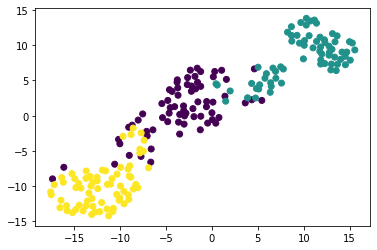

In [44]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


## A t-SNE map of the stock market

<p>t-SNE provides great visualizations when the individual samples can be labeled.  In this exercise, you&apos;ll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market!  The stock price movements for each company are available as the array <code>normalized_movements</code> (these have already been normalized for you). The list <code>companies</code> gives the name of each company.  PyPlot (<code>plt</code>) has been imported for you.</p>

<ul>
<li>Import <code>TSNE</code> from <code>sklearn.manifold</code>.</li>
<li>Create a TSNE instance called <code>model</code> with <code>learning_rate=50</code>.</li>
<li>Apply the <code>.fit_transform()</code> method of <code>model</code> to <code>normalized_movements</code>. Assign the result to <code>tsne_features</code>.</li>
<li>Select column <code>0</code> and column <code>1</code> of <code>tsne_features</code>.</li>
<li>Make a scatter plot of the t-SNE features <code>xs</code> and <code>ys</code>. Specify the additional keyword argument <code>alpha=0.5</code>.</li>
<li>Code to label each point with its company name has been written for you using <code>plt.annotate()</code>, so just hit &apos;Submit Answer&apos; to see the visualization!</li>
</ul>

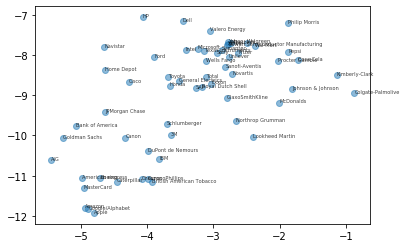

In [48]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
